The MIT License (MIT)<br>
Copyright (c) 2018 Massachusetts Institute of Technology<br>

Authors: Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

TESS End-to-End 6 Simulated Light Curve Time Series<br>
Source: https://archive.stsci.edu/tess/ete-6.html

In [3]:
from skdaccess.astro.tess.simulated.cache import DataFetcher as TESS_DF
from skdaccess.framework.param_class import *
import numpy as np

In [4]:
tess_fetcher = TESS_DF([AutoList([376664523])])

In [5]:
tess_dw = tess_fetcher.output()

In [6]:
label, data = next(tess_dw.getIterator())

Normalize flux

In [7]:
valid_index = data['PDCSAP_FLUX'] != 0.0
data.loc[valid_index, 'RELATIVE_PDCSAP_FLUX'] = data.loc[valid_index, 'PDCSAP_FLUX'] / np.median(data.loc[valid_index, 'PDCSAP_FLUX'])

Plot Relative PDCSAP Flux vs time

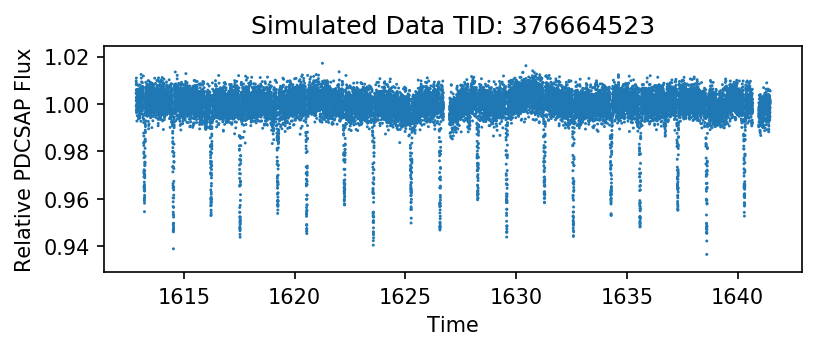

In [8]:
plt.gcf().set_size_inches(6,2);
plt.scatter(data.loc[valid_index, 'TIME'], data.loc[valid_index, 'RELATIVE_PDCSAP_FLUX'], s=2, edgecolor='none');
plt.xlabel('Time');
plt.ylabel('Relative PDCSAP Flux');
plt.title('Simulated Data TID: ' + str(int(label)));